In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob
import math
import scipy.stats as stats
import scipy

C:\Users\scanimage\AppData\Local\Temp\ipykernel_20452\2801413210.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [9]:
#data_directory = '/Volumes/My_Passport/cnmfe_analysis_files/OpenFieldAnalysis/2020/D1_mGluRKO_clustering/data/run_01/wt'
#data_directory_ko = '/Volumes/My_Passport/cnmfe_analysis_files/OpenFieldAnalysis/2020/D1_mGluRKO_clustering/data/run_01/ko'
data_directory = r'F:\\JJM\\miniscope_analysis\\clustering_analysis\\all_frames_2023-02-20-16-51-10_analysisOutput\\'

In [19]:
#'GRIN034_H16_M13_S22', 'GRIN034_H19_M0_S18', 'GRIN034_H15_M28_S2', 
WT_sessions = ['GRIN013_H13_M33_S54', 'GRIN026_H16_M35_S34', 'GRIN027_H13_M29_S44', 
               'GRIN032_H16_M49_S22', 'GRIN032_H17_M30_S22', 
               'GRIN033_H13_M42_S33', 'GRIN033_H14_M34_S32', 

               'GRIN035_H13_M31_S20', 'GRIN035_H13_M50_S58', 'GRIN035_H14_M40_S34',
               'GRIN039_H12_M26_S54', 'GRIN039_H12_M33_S29', 'GRIN039_H14_M8_S53'] ; 
#'GRIN018_H16_M13_S53'
KO_sessions = ['GRIN009_H13_M59_S14', 'GRIN011_H10_M19_S59', 
               'GRIN012_H16_M57_S23', 'GRIN012_H17_M32_S17', 
               'GRIN018_H17_M41_S43', 'GRIN018_H16_M13_S53',
               'GRIN038_H11_M57_S0', 'GRIN038_H13_M37_S23', 'GRIN038_H15_M39_S40',
               'GRIN041_H12_M54_S49'] ;

## compile and plot genotype data

In [20]:
#compile in dictionaries
#might need to shift matlab pair inidcies due to 1-indexing
jaccard_analysis_by_session = {}
for session in WT_sessions:
    print(session)
    session_output = {}
    for file in glob.glob(data_directory+'/'+session+'*normlBinnedCellJaccards.csv'):
        session_output[file.split('_')[-1].strip('.csv')] = pd.read_csv(file, header=None)
    jaccard_analysis_by_session[session] = session_output
    
#compile in dictionaries
#might need to shift matlab pair inidcies due to 1-indexing
jaccard_analysis_by_session_ko = {}
for session in KO_sessions:
    print(session)
    session_output = {}
    for file in glob.glob(data_directory+'/'+session+'*normlBinnedCellJaccards.csv'):
        session_output[file.split('_')[-1].strip('.csv')] = pd.read_csv(file, header=None)
    jaccard_analysis_by_session_ko[session] = session_output

GRIN013_H13_M33_S54
GRIN026_H16_M35_S34
GRIN027_H13_M29_S44
GRIN032_H16_M49_S22
GRIN032_H17_M30_S22
GRIN033_H13_M42_S33
GRIN033_H14_M34_S32
GRIN035_H13_M31_S20
GRIN035_H13_M50_S58
GRIN035_H14_M40_S34
GRIN039_H12_M26_S54
GRIN039_H12_M33_S29
GRIN039_H14_M8_S53
GRIN009_H13_M59_S14
GRIN011_H10_M19_S59
GRIN012_H16_M57_S23
GRIN012_H17_M32_S17
GRIN018_H17_M41_S43
GRIN018_H16_M13_S53
GRIN038_H11_M57_S0
GRIN038_H13_M37_S23
GRIN038_H15_M39_S40
GRIN041_H12_M54_S49


In [21]:
jaccard_analysis_by_session

{'GRIN013_H13_M33_S54': {'normlBinnedCellJaccard':         0       1       2       3       4       5       6       7   8
  0  13.916  8.7062  8.4163  7.3193  5.9362  4.6255  4.0566  5.4913 NaN},
 'GRIN026_H16_M35_S34': {'normlBinnedCellJaccard':         0       1       2       3       4       5       6       7       8
  0  17.335  9.9737  7.5499  7.0866  7.2345  7.4587  8.6495  7.9142  4.9188},
 'GRIN027_H13_M29_S44': {'normlBinnedCellJaccard':         0       1       2       3       4       5       6       7   8
  0  12.532  7.3329  5.9637  5.2002  5.2912  5.3042  4.5312  2.3334 NaN},
 'GRIN032_H16_M49_S22': {'normlBinnedCellJaccard':         0      1       2       3       4       5       6       7      8
  0  11.884  8.216  8.2662  7.6518  8.3605  8.2963  8.5336  9.2715  10.24},
 'GRIN032_H17_M30_S22': {'normlBinnedCellJaccard':         0       1       2       3       4       5       6       7      8
  0  19.398  13.867  12.958  12.891  12.333  12.719  12.945  13.615  13.18},
 'GRIN0

In [22]:
#plot across sessions
genotype_compiled = pd.concat([jaccard_analysis_by_session[session]['normlBinnedCellJaccard'] for session in WT_sessions], keys=WT_sessions)
genotype_compiled_ko = pd.concat([jaccard_analysis_by_session_ko[session]['normlBinnedCellJaccard'] for session in KO_sessions], keys=KO_sessions)

In [23]:
#average multiple sessions per mouse 
#wt: GRIN013, GRIN026, GRIN027, GRIN032, GRIN033, GRIN035, GRIN039, GRIN040, GRIN044, GRIN045  
#ko: GRIN009, GRIN011, GRIN012, GRIN018, GRIN041, GRIN038, GRIN043, GRIN042, 
wt_by_mouse = {}
wt_by_mouse['GRIN013'] = genotype_compiled.loc['GRIN013_H13_M33_S54']
wt_by_mouse['GRIN026'] = genotype_compiled.loc['GRIN026_H16_M35_S34']
wt_by_mouse['GRIN027'] = genotype_compiled.loc['GRIN027_H13_M29_S44']
wt_by_mouse['GRIN032'] = pd.DataFrame(genotype_compiled.loc[['GRIN032_H16_M49_S22','GRIN032_H17_M30_S22']].mean(axis=0)).transpose()
wt_by_mouse['GRIN033'] = pd.DataFrame(genotype_compiled.loc[['GRIN033_H13_M42_S33','GRIN033_H14_M34_S32', ]].mean(axis=0)).transpose()
#wt_by_day['GRIN034'] = pd.DataFrame(genotype_compiled.loc[['GRIN034_H16_M13_S22', 'GRIN034_H19_M0_S18', 'GRIN034_H15_M28_S2']].mean(axis=0)).transpose()
wt_by_mouse['GRIN035'] = pd.DataFrame(genotype_compiled.loc[['GRIN035_H13_M31_S20', 'GRIN035_H13_M50_S58', 'GRIN035_H14_M40_S34']].mean(axis=0)).transpose()
wt_by_mouse['GRIN039'] = pd.DataFrame(genotype_compiled.loc[['GRIN039_H12_M26_S54', 'GRIN039_H12_M33_S29', 'GRIN039_H14_M8_S53']].mean(axis=0)).transpose()

wt_by_mouse = pd.concat(wt_by_mouse.values(), keys=wt_by_mouse.keys())

#ko 
ko_by_mouse = {}
ko_by_mouse['GRIN009'] = genotype_compiled_ko.loc['GRIN009_H13_M59_S14']
ko_by_mouse['GRIN011'] = genotype_compiled_ko.loc['GRIN011_H10_M19_S59']
ko_by_mouse['GRIN012'] = pd.DataFrame(genotype_compiled_ko.loc[['GRIN012_H16_M57_S23', 'GRIN012_H17_M32_S17']].mean(axis=0)).transpose() 
ko_by_mouse['GRIN018'] = pd.DataFrame(genotype_compiled_ko.loc[['GRIN018_H17_M41_S43', 'GRIN018_H16_M13_S53' ]].mean(axis=0)).transpose() 
ko_by_mouse['GRIN038'] = pd.DataFrame(genotype_compiled_ko.loc[['GRIN038_H11_M57_S0', 'GRIN038_H13_M37_S23', 'GRIN038_H15_M39_S40' ]].mean(axis=0)).transpose()
ko_by_mouse['GRIN041'] = genotype_compiled_ko.loc['GRIN041_H12_M54_S49']

ko_by_mouse = pd.concat(ko_by_mouse.values(), keys=ko_by_mouse.keys())

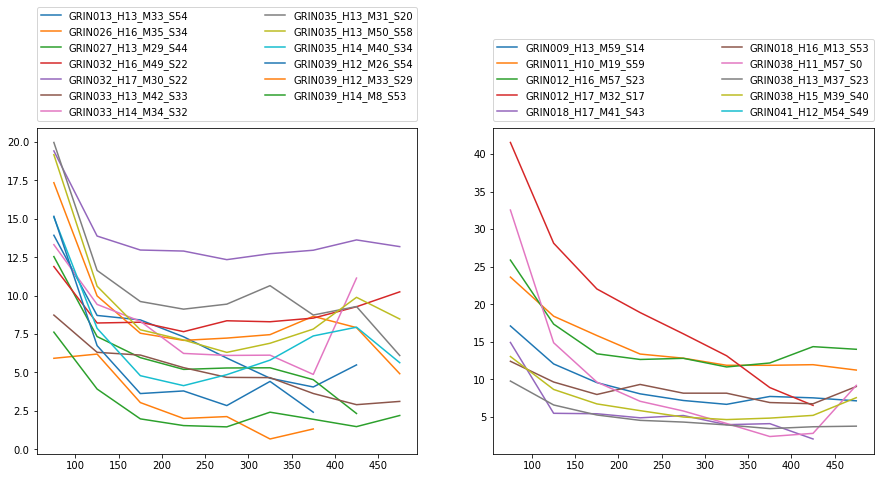

In [24]:
## individual sessions 
fig = plt.figure()
plt.subplot(1, 2, 1)

for session in range(len(genotype_compiled)):
    bin_vector = np.linspace(75, 475, len(genotype_compiled.iloc[session,:].values))
    plt.plot(bin_vector, genotype_compiled.iloc[session,:].values, label=list(genotype_compiled.index)[session][0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)

plt.subplot(1, 2, 2)

for session in range(len(genotype_compiled_ko)):
    bin_vector = np.linspace(75, 475, len(genotype_compiled_ko.iloc[session,:].values))
    plt.plot(bin_vector, genotype_compiled_ko.iloc[session,:].values, label=list(genotype_compiled_ko.index)[session][0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)
#fig.savefig('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/openfield_analysis/spatial_clustering/summary_figs/coactivity_data_bysession_sidebyside.pdf', transparent=True)
plt.show()

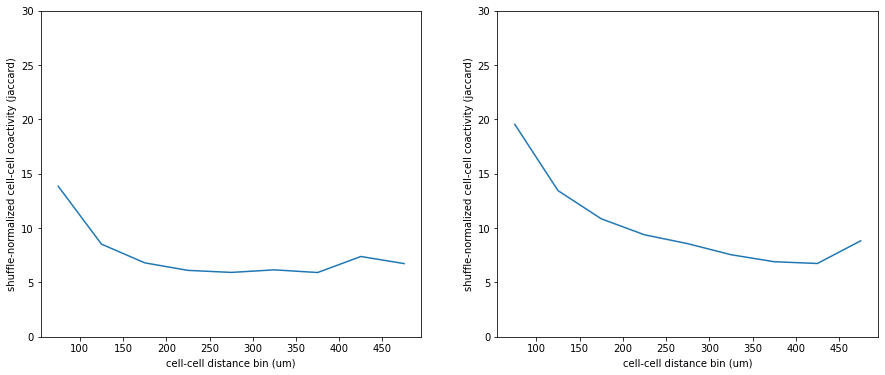

In [25]:
#plot average for genotype
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.plot(bin_vector, genotype_compiled.mean())
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,30))
#plot average for genotype
plt.subplot(1, 2, 2)
plt.plot(bin_vector, genotype_compiled_ko.mean())
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((0,30))


fig.set_size_inches(15, 6)
#fig.savefig('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/openfield_analysis/spatial_clustering/summary_figs/coactivity_data_sidebyside.pdf', transparent=True)
plt.show()

## overlay ko and wt 

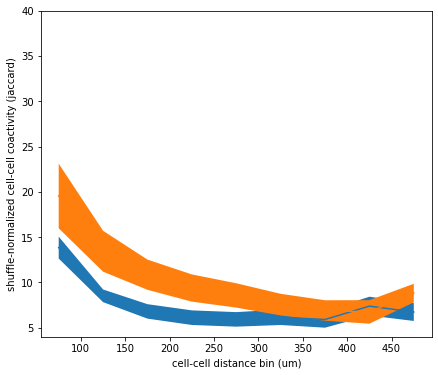

In [26]:
mean = genotype_compiled.mean()
mean_ko = genotype_compiled_ko.mean()
std_error = genotype_compiled.std()/math.sqrt(14)
std_error_ko = genotype_compiled_ko.std()/math.sqrt(10)
plt.plot(bin_vector, mean)
plt.plot(bin_vector, mean_ko)
plt.fill_between(bin_vector, mean-std_error, mean+std_error)
plt.fill_between(bin_vector, mean_ko-std_error_ko, mean_ko+std_error_ko)
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((4,40))
fig = plt.gcf()
fig.set_size_inches(7, 6)
#fig.savefig('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/openfield_analysis/spatial_clustering/summary_figs/combined_coactivity.pdf', transparent=True)
plt.show()

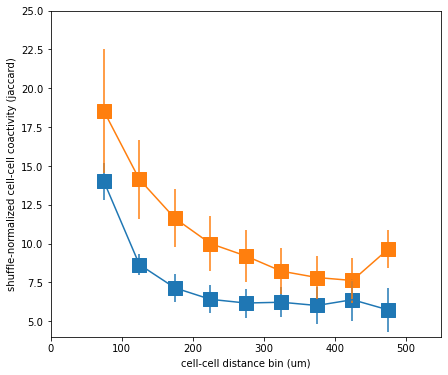

In [43]:
## averages by mouse
mean = wt_by_mouse.mean()
mean_ko = ko_by_mouse.mean()
std_error = wt_by_mouse.std()/math.sqrt(7)
std_error_ko = ko_by_mouse.std()/math.sqrt(6)
plt.scatter(bin_vector, mean, s=200, marker='s')
plt.scatter(bin_vector, mean_ko, s=200,  marker='s')
plt.errorbar(bin_vector, mean, yerr=std_error)
plt.errorbar(bin_vector, mean_ko, yerr=std_error_ko)
#plt.fill_between(bin_vector, mean-std_error, mean+std_error)
#plt.fill_between(bin_vector, mean_ko-std_error_ko, mean_ko+std_error_ko)
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((4,25))
ax.set_xlim((0,550))
fig = plt.gcf()
fig.set_size_inches(7, 6)
fig.savefig(r'F:\JJM\miniscope_analysis\clustering_analysis\summary_figs\normalized_shuffled_jaccards_creon_by_mouse.pdf', transparent=True)
plt.show()

In [44]:
wt_by_mouse.to_csv(r'F:\JJM\miniscope_analysis\clustering_analysis\summary_figs\wt_normalized_shuffled_jaccards_by_mouse.csv')
ko_by_mouse.to_csv(r'F:\JJM\miniscope_analysis\clustering_analysis\summary_figs\ko_normalized_shuffled_jaccards_by_mouse.csv')

In [59]:
wt_by_mouse.values[0]

array([13.55  ,  8.4772,  8.195 ,  7.1268,  5.7801,  4.5038,  3.9499,
        5.3468,     nan])

In [29]:
wt_by_mouse.values

array([[13.916     ,  8.7062    ,  8.4163    ,  7.3193    ,  5.9362    ,
         4.6255    ,  4.0566    ,  5.4913    ,         nan],
       [17.335     ,  9.9737    ,  7.5499    ,  7.0866    ,  7.2345    ,
         7.4587    ,  8.6495    ,  7.9142    ,  4.9188    ],
       [12.532     ,  7.3329    ,  5.9637    ,  5.2002    ,  5.2912    ,
         5.3042    ,  4.5312    ,  2.3334    ,         nan],
       [15.641     , 11.0415    , 10.6121    , 10.2714    , 10.34675   ,
        10.50765   , 10.7393    , 11.44325   , 11.71      ],
       [11.0186    ,  7.86665   ,  7.22985   ,  5.776     ,  5.3946    ,
         5.39495   ,  4.25425   ,  7.02075   ,  3.1191    ],
       [18.06766667, 10.0358    ,  7.39293333,  6.78966667,  6.86753333,
         7.7812    ,  7.97556667,  9.03776667,  6.73686667],
       [ 9.56316667,  5.62096667,  2.88566667,  2.45273333,  2.1486    ,
         2.50537667,  1.90113333,  1.4805    ,  2.2039    ]])

In [30]:
bin_num=0
stats.kruskal(wt_by_mouse.values, ko_by_mouse.values, nan_policy='omit')

ValueError: Samples must be one-dimensional.

In [41]:
bin_num=1
stats.mannwhitneyu(wt_by_mouse.values[bin_num], ko_by_mouse.values[bin_num])

MannwhitneyuResult(statistic=7.0, pvalue=0.003568628436933387)

In [62]:
wt_by_mouse

,,0,1,2,3,4,5,6,7,8
GRIN013,0,13.550000,8.477200,8.195000,7.126800,5.780100,4.503800,3.949900,5.34680,NaN
GRIN026,0,16.307000,9.382600,7.102500,6.666600,6.805700,7.016600,8.136900,7.44510,4.627300
GRIN027,0,13.759000,8.050700,6.547500,5.709200,5.809200,5.823400,4.974700,2.56190,NaN
GRIN032,0,15.891500,11.226550,10.773150,10.443000,10.490450,10.662650,10.894600,11.60110,11.837950
GRIN033,0,11.653650,8.317600,7.631950,6.082150,5.690800,5.691700,4.489900,7.52175,3.162000
GRIN035,0,18.282000,10.149733,7.468933,6.856267,6.895200,7.802333,8.043233,9.16240,6.882767
GRIN039,0,9.681267,5.705700,2.929633,2.492200,2.181433,2.526410,1.915667,1.42960,2.128100


In [63]:
ko_by_mouse

,,0,1,2,3,4,5,6,7,8
GRIN009,0,15.517000,10.92400,8.6667,7.307300,6.503000,6.037800,6.99080,6.822800,6.463400
GRIN011,0,24.341000,18.96600,16.3130,13.768000,13.199000,12.226000,12.22200,12.306000,11.567000
GRIN012,0,33.652500,22.69850,17.6830,15.715000,14.342000,12.296000,10.38685,10.224950,13.460000
GRIN018,0,13.541500,7.50625,6.6464,7.048400,6.618100,6.014350,5.45860,4.370700,9.032000
GRIN038,0,19.320267,10.36700,7.3874,5.925167,5.106367,4.259767,3.51630,3.868967,6.990333
GRIN041,0,5.397800,NaN,14.5740,NaN,NaN,NaN,NaN,NaN,NaN


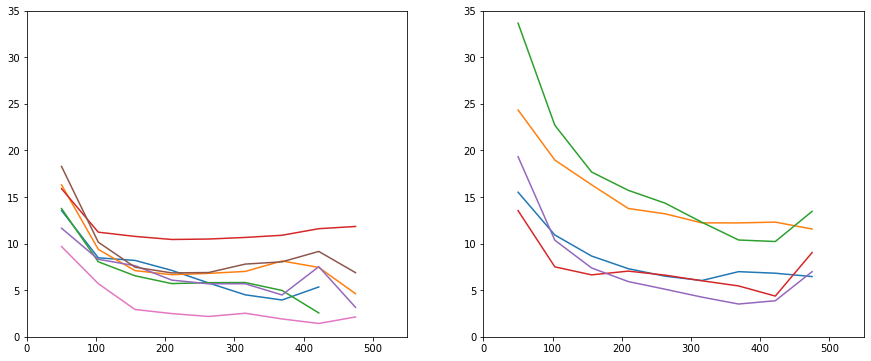

In [69]:
## individual mice 

## individual sessions 
fig = plt.figure()
plt.subplot(1, 2, 1)

for session in range(len(wt_by_mouse)):
    bin_vector = np.linspace(50, 475, len(wt_by_mouse.values[session]))
    plt.plot(bin_vector, wt_by_mouse.values[session])

ax = plt.gca()
ax.set_ylim((0,35))
ax.set_xlim((0,550))

plt.subplot(1, 2, 2)
    
for session in range(len(ko_by_mouse)):
    bin_vector = np.linspace(50, 475, len(ko_by_mouse.values[session]))
    plt.plot(bin_vector, ko_by_mouse.values[session])

ax = plt.gca()
ax.set_ylim((0,35))
ax.set_xlim((0,550))

fig.set_size_inches(15, 6)

In [70]:
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

In [106]:
## fit decay of individual curves 
fit_params_wt = {}
for session in range(len(wt_by_mouse)):
    x_array = bin_vector
    y_array_exp = wt_by_mouse.values[session]
    # remove nan values to fit decay 
    if len(np.argwhere(np.isnan(y_array_exp)))!=0:
        y_array_exp_nonan = np.delete(y_array_exp, np.argwhere(np.isnan(y_array_exp))[0])
        x_array_nonan = np.delete(x_array, np.argwhere(np.isnan(y_array_exp))[0])
        popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, x_array_nonan, 
                                                                  y_array_exp_nonan, 
                                                                  p0=[1,-0.5, 1])
    else:
        popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, x_array, 
                                                                  y_array_exp, 
                                                                  p0=[1,-0.5, 1])
    
    fit_params_wt[session]=popt_exponential
    
fit_params_ko = {}
for session in range(len(ko_by_mouse)-1):
    x_array = bin_vector
    y_array_exp = ko_by_mouse.values[session]
    # remove nan values to fit decay 
    if len(np.argwhere(np.isnan(y_array_exp)))!=0:
        y_array_exp_nonan = np.delete(y_array_exp, np.argwhere(np.isnan(y_array_exp))[0])
        x_array_nonan = np.delete(x_array, np.argwhere(np.isnan(y_array_exp))[0])
        popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, x_array_nonan, 
                                                                  y_array_exp_nonan, 
                                                                  p0=[1,-0.5, 1])
    else:
        popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, x_array, 
                                                                  y_array_exp, 
                                                                  p0=[1,-0.5, 1])
    
    fit_params_ko[session]=popt_exponential

In [107]:
fit_params_wt

{0: array([ 1.    , -0.5   ,  7.1162]),
 1: array([ 1.        , -0.5       ,  8.16558889]),
 2: array([ 1.     , -0.5    ,  6.65445]),
 3: array([ 1.        , -0.5       , 11.53566111]),
 4: array([ 1.    , -0.5   ,  6.6935]),
 5: array([ 1.        , -0.5       ,  9.06031852]),
 6: array([ 1.        , -0.5       ,  3.44333444])}

In [108]:
fit_params_ko

{0: array([ 1.    , -0.5   ,  8.3592]),
 1: array([ 1.        , -0.5       , 14.98977778]),
 2: array([ 1.        , -0.5       , 16.71764444]),
 3: array([ 1.        , -0.5       ,  7.35958889]),
 4: array([ 1.        , -0.5       ,  7.41572965])}